In [1]:
import smote_variants as sv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import imbalanced_databases as imbd
from sklearn import metrics
from sklearn.datasets import load_wine
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import plot_roc_curve
from imblearn.over_sampling import SMOTE

%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
data_train = pd.read_csv('ml_dataset.csv')

In [3]:
data = data_train.copy()

In [4]:
data.head()

,Unnamed: 0,pkts,bytes,dur,avg_dur,stddev_dur,tot_dur,min_dur,max_dur,spkts,...,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack
0,0,10,1729,6.406424,0.679473,0.544126,1.358946,0.135347,1.223599,6,...,700,1.26889,1.21662,40,38,1.56093,1.21662,328,308,1
1,1,10,1604,6.405851,0.679572,0.544197,1.359144,0.135375,1.223769,6,...,700,1.26889,1.21662,40,38,1.56107,1.21662,328,308,1
2,2,8,1708,6.401038,1.110847,1.110847,2.221694,0.000000,2.221694,5,...,700,1.26889,1.21662,40,38,1.24980,1.21662,328,308,1
3,3,8,1462,6.400703,1.113328,1.113328,2.226655,0.000000,2.226655,5,...,700,1.26889,1.21662,40,38,1.24986,1.21662,328,308,1
4,4,8,1296,6.400472,1.113098,1.113098,2.226195,0.000000,2.226195,5,...,700,1.26889,1.21662,40,38,1.24991,1.21662,328,308,1


In [5]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
data.head()

,pkts,bytes,dur,avg_dur,stddev_dur,tot_dur,min_dur,max_dur,spkts,dpkts,...,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack
0,10,1729,6.406424,0.679473,0.544126,1.358946,0.135347,1.223599,6,4,...,700,1.26889,1.21662,40,38,1.56093,1.21662,328,308,1
1,10,1604,6.405851,0.679572,0.544197,1.359144,0.135375,1.223769,6,4,...,700,1.26889,1.21662,40,38,1.56107,1.21662,328,308,1
2,8,1708,6.401038,1.110847,1.110847,2.221694,0.000000,2.221694,5,3,...,700,1.26889,1.21662,40,38,1.24980,1.21662,328,308,1
3,8,1462,6.400703,1.113328,1.113328,2.226655,0.000000,2.226655,5,3,...,700,1.26889,1.21662,40,38,1.24986,1.21662,328,308,1
4,8,1296,6.400472,1.113098,1.113098,2.226195,0.000000,2.226195,5,3,...,700,1.26889,1.21662,40,38,1.24991,1.21662,328,308,1


In [7]:
data_attack = data[data['attack'] == 1]

In [8]:
data_normal = data[data['attack'] == 0]

1    1926608
0        477
Name: attack, dtype: int64

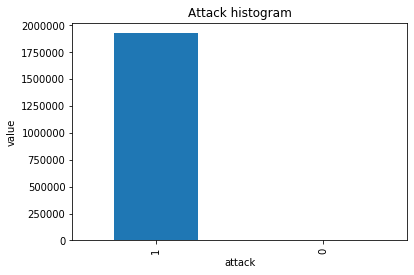

In [9]:
pd.value_counts(data['attack']).plot.bar()
plt.title('Attack histogram')
plt.xlabel('attack')
plt.ylabel('value')
data['attack'].value_counts()

In [14]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='blue', label = 'ROC')
    plt.plot([0, 1], [0,1], color='red', linestyle='--')
    plt.xlabel('False Positive')
    plt.ylabel('True Positive')
    plt.title('Reciver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

def classif_results():
  conf_mat = confusion_matrix(y_true=y_test , y_pred=y_pred)
  print('Confusion matrix:\n', conf_mat)
    
  labels= ['Class 0', 'Class 1']
  fig = plt.figure()
  ax = fig.add_subplot(111)
  cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
  fig.colorbar(cax)
  ax.set_xticklabels([''] + labels)
  ax.set_yticklabels([''] + labels)
  plt.xlabel('Predicted')
  plt.ylabel('Expected')
  plt.show()
  
  print("Accuracy", metrics.accuracy_score(y_test, y_pred))

  from sklearn.metrics import classification_report
  print(classification_report(y_test, y_pred))

  auc = roc_auc_score(y_test, y_pred)
  print("AUC Score: ")
  print(auc)

  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  plot_roc_curve(fpr, tpr)
    
def test_scale():
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    
  from sklearn.preprocessing import StandardScaler
  sc_X = StandardScaler()
  X_train = sc_X.fit_transform(X_train)
  X_test = sc_X.transform(X_test)

In [15]:
X = data.iloc[:, data.columns != 'attack']
Y = data.iloc[:, data.columns == 'attack']
X, y = SMOTE(random_state=42).fit_resample(X, Y)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [17]:
#logistic regression
test_scale()

from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Confusion matrix:
 [[385583      0]
 [    41 385020]]


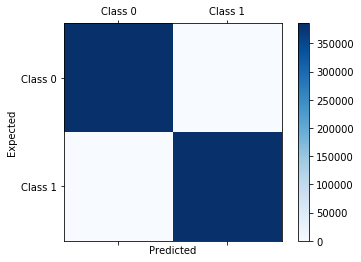

Accuracy 0.9999467977431862
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    385583
           1       1.00      1.00      1.00    385061

    accuracy                           1.00    770644
   macro avg       1.00      1.00      1.00    770644
weighted avg       1.00      1.00      1.00    770644

AUC Score: 
0.9999467616819153


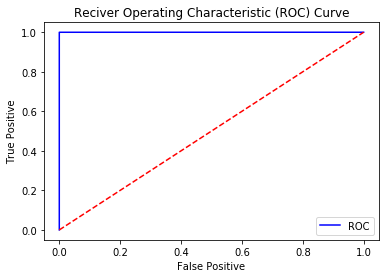

In [18]:
classif_results()

In [15]:
#SVM
test_scale()

from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Confusion matrix:
 [[771384      0]
 [    61 769842]]


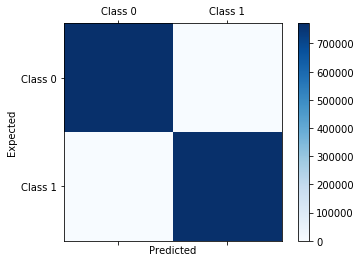

Accuracy 0.9999604226857165
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    771384
           1       1.00      1.00      1.00    769903

    accuracy                           1.00   1541287
   macro avg       1.00      1.00      1.00   1541287
weighted avg       1.00      1.00      1.00   1541287

AUC Score: 
0.9999603846198807


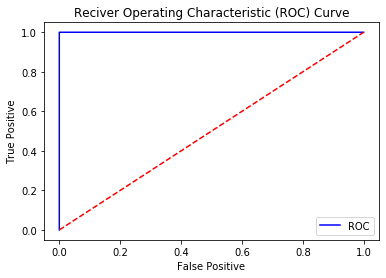

In [16]:
classif_results()

In [19]:
#neural network
import keras
from keras.models import Sequential
from keras.layers import Dense


classifier = Sequential()
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 29))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.fit(X_train, y_train, batch_size = 10, epochs = 3)

y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

Epoch 1/3
308258/308258 [==============================] - 269s 810us/step - loss: 0.0050 - accuracy: 0.9988
Epoch 2/3
308258/308258 [==============================] - 248s 805us/step - loss: 1.5043e-04 - accuracy: 1.0000
Epoch 3/3
308258/308258 [==============================] - 248s 804us/step - loss: 2.7046e-04 - accuracy: 1.0000


Confusion matrix:
 [[385583      0]
 [     3 385058]]


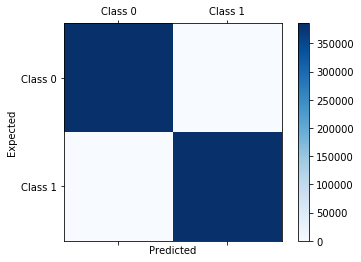

Accuracy 0.9999961071519404
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    385583
           1       1.00      1.00      1.00    385061

    accuracy                           1.00    770644
   macro avg       1.00      1.00      1.00    770644
weighted avg       1.00      1.00      1.00    770644

AUC Score: 
0.9999961045133109


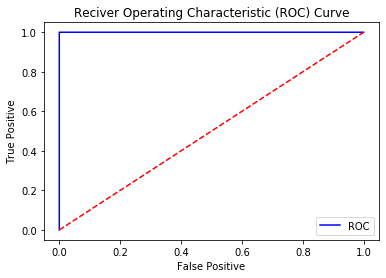

In [20]:
classif_results()